#Простейший расчет потенциала электрического поля вокруг кубсата 1U (плоский вариант). Уточнение значения потенциала на внешней границе.


In [19]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
field_size = 100
number_of_nodes = field_size + 1
h = 1

In [21]:
satellite_radius = 5

###Граничные условия

In [22]:
satellite_surface_potential = 10

###Создание сетки

In [23]:
U = np.zeros((number_of_nodes, number_of_nodes))
satellite_center = number_of_nodes // 2

###Расчёт потенциала

In [24]:
max_iter = 10000
accuracy = 1e-4

In [25]:
def is_circle_satellite(x, y, satellite_center, satellite_radius):
  inside_satellite_circle_radius = np.sqrt((i - satellite_center)**2 + (j - satellite_center)**2)

  return inside_satellite_circle_radius < satellite_radius

In [26]:
def is_square_satellite_surface(x, y, satellite_center, satellite_radius):
  y_distance = abs(i - satellite_center)
  x_distance = abs(j - satellite_center)

  return y_distance == satellite_radius or x_distance == satellite_radius

In [28]:
def square_area_side_distance(satellite_radius, satellite_center, satellite_surface_potential):
   square_area_side_distance = satellite_surface_potential * satellite_radius / np.sqrt(satellite_center * satellite_center + (i - satellite_radius) ** 2)

   return square_area_side_distance

In [29]:
for iteration in range(max_iter):
    U_prev = U.copy()

    for i in range(1, number_of_nodes - 1):
        for j in range(1, number_of_nodes - 1):
            if is_circle_satellite(j, i, satellite_center, satellite_radius):
                pass
            else:
                U[i, j] = 0.25 * (U_prev[i + 1, j] + U_prev[i - 1, j] +
                                  U_prev[i, j + 1] + U_prev[i, j - 1])

    for i in range(satellite_center - satellite_radius, satellite_center + satellite_radius + 1):
        for j in range(satellite_center - satellite_radius, satellite_center + satellite_radius + 1):
            if is_square_satellite_surface(j, i, satellite_center, satellite_radius):
                U[i, j] = satellite_surface_potential
            else:
                U[i, j] = 0

    for i in range(number_of_nodes):
        U[0, i] = U[number_of_nodes-1, i] = U[i, 0] = U[i, number_of_nodes-1] = square_area_side_distance(satellite_radius, satellite_center, satellite_surface_potential)

    if np.max(np.abs(U - U_prev)) < accuracy:
        print(f"Требуется {iteration} итераций")
        break

Требуется 4000 итераций


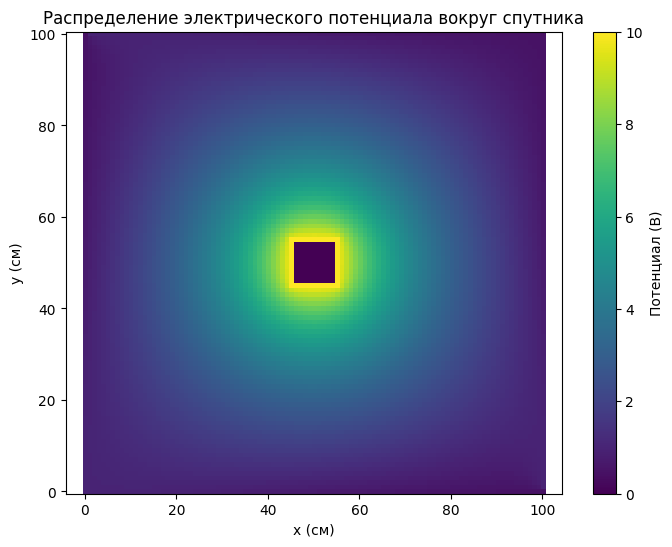

In [30]:
plt.figure(figsize=(8, 6))
plt.imshow(U)
plt.colorbar(label='Потенциал (В)')
plt.title('Распределение электрического потенциала вокруг спутника')
plt.xlabel('x (см)')
plt.ylabel('y (см)')
plt.gca().invert_yaxis()
plt.axis('equal')
plt.show()